In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
# If you have a local dataset, you can use pd.read_csv('path_to_your_dataset.csv') instead.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = [
    'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
    'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue',
    'OD280/OD315_of_diluted_wines', 'Proline'
]
df = pd.read_csv(url, header=None, names=['Class'] + columns)

In [ ]:
df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
# Standardize the features
features = df.columns[1:]
x = df.loc[:, features].values
y = df.loc[:, ['Class']].values
x = StandardScaler().fit_transform(x)

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
principal_df

,Principal Component 1,Principal Component 2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


In [ ]:
# Concatenate with target variable
df = pd.concat([principal_df, df[['Class']]], axis=1)

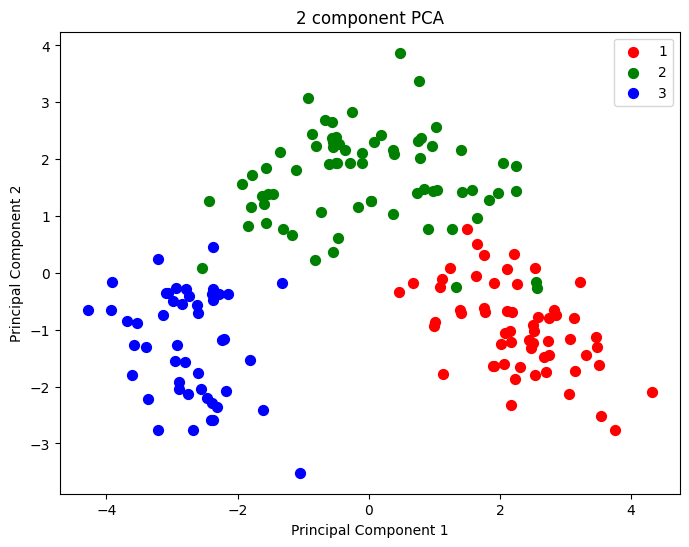

In [ ]:
# Visualize the results
plt.figure(figsize=(8, 6))
targets = [1, 2, 3]  # Assuming there are 3 classes in the wine dataset
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indices_to_keep = df['Class'] == target
    plt.scatter(df.loc[indices_to_keep, 'Principal Component 1'],
                df.loc[indices_to_keep, 'Principal Component 2'],
                c=color, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.title('2 component PCA')
plt.show()

**OR**